#### Algorithmen des maschinellen Lernens: 
###### überwachtes und unüberwachtes Lernen
Ein Beispiel des überwachten Lernens ist der Algorithmus der linearen Regression, der zuerst anhand gegebenen Datensätzen trainiert wird und dann ein gewisses Ziel-Attribut (Label) für _ungesehene_ Daten einschätzt.
Dabei werden Daten in Training- und Testing-Set eingeteilt.
**Das Ziel jeglicher Aufgaben in ML ist, anhand existierenden Daten, die Verteilung von Datenpunkten möglichst genau zu beschreiben.**

Regressionsanalyse und Klassifikation sind beide gute Beispiele für überwachtes Lernen.

### Lineare Regression
Es handelt sich dabei um eine lineare Beschreibung von Verteilung von Datenpunkten. Das heißt, die Verteilung von Datenpunkten lässt sich durch eine lineare Gleichung gut beschreiben, die gleichzeitig eine Gerade im Koordinatensystem beschreibt.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Warnungen ausblenden

### Single. vs. Multiple LR
- Single Linear Regression: ein einziges Merkmal
- Multiple Linear Regression: mehrere Merkmale

In [46]:
df=pd.read_csv('C:/Users/OlhaIshchenko/Documents/Daten_Analyse/unterricht/csv_Datei/house_data.csv')

In [3]:
df.head()

,sq_feet,num_bedrooms,num_bathrooms,sale_price
0,785,2,2,170461
1,1477,2,2,271651
2,712,1,1,139912
3,3233,3,3,603246
4,1581,2,1,278603


Wir können hier nur ein einziges Merkmal, wie z.B. `sq_feet` zur Einschätzung vom Verkaufspreis `sale_price` berücksichtigen. Dann haben wir eine Single-LR-Analyse durchgeführt. Dies haben wir in unserer Aufgabe bereits gesehen. Wir wollen jetzt mehrere Merkmale in der Einschätzung mitberücksichtigen.

In [4]:
df.corr() # Korrelationen

,sq_feet,num_bedrooms,num_bathrooms,sale_price
sq_feet,1.000000,0.573055,0.198563,0.994068
num_bedrooms,0.573055,1.000000,0.265827,0.636731
num_bathrooms,0.198563,0.265827,1.000000,0.232709
sale_price,0.994068,0.636731,0.232709,1.000000


In [45]:
df[['num_bathrooms', 'num_bedrooms']].corr()

,num_bathrooms,num_bedrooms
num_bathrooms,1.000000,0.265827
num_bedrooms,0.265827,1.000000


<Axes: >

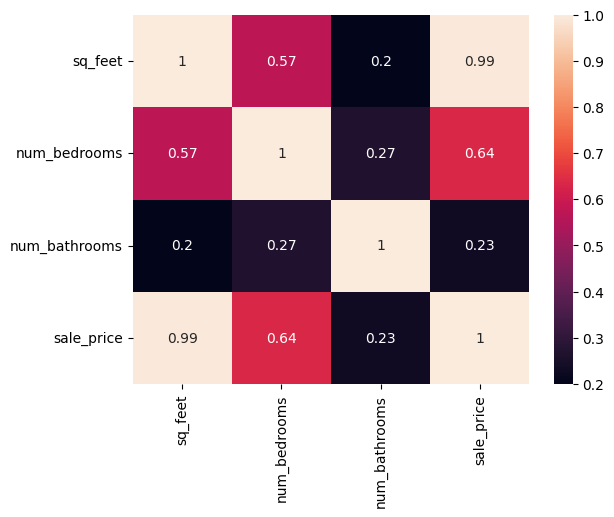

In [5]:
sns.heatmap(df.corr(), annot=True)#Korrelation

### Visualisierung
Das Verhältnis vom Verkaufspreis `sale_price` zu jedem Merkmal visualisieren:

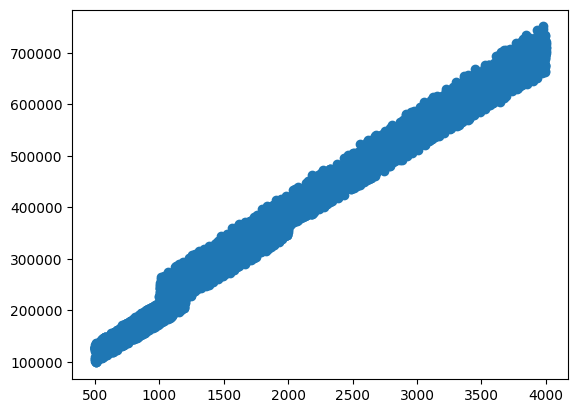

In [6]:
plt.scatter(x='sq_feet',y='sale_price',data=df)
plt.show()

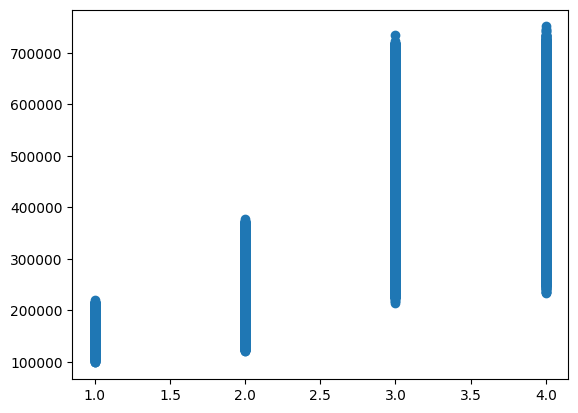

In [7]:
plt.scatter(x='num_bedrooms',y='sale_price',data=df)
plt.show()

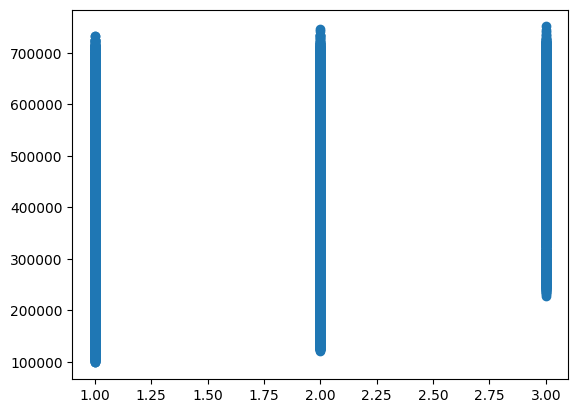

In [8]:
plt.scatter(x='num_bathrooms',y='sale_price',data=df)
plt.show()

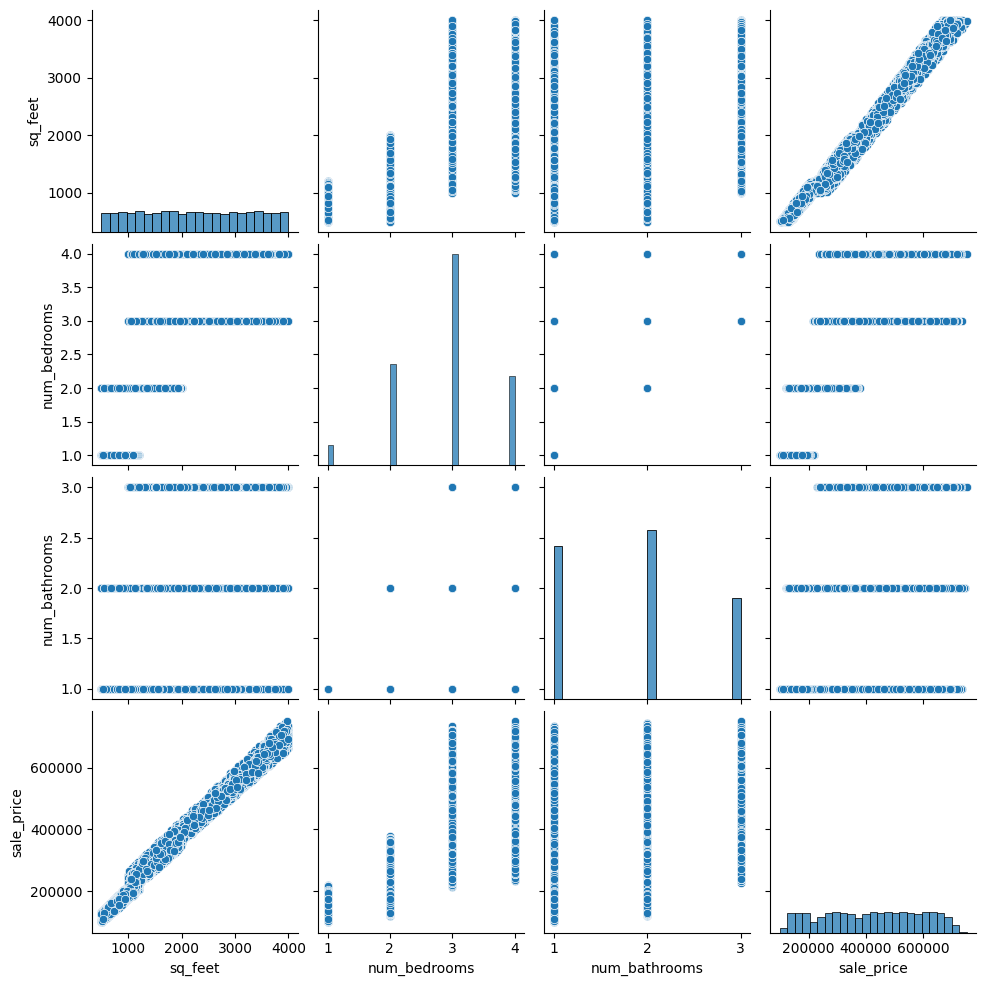

In [9]:
sns.pairplot(df)

In [10]:
X = df[['sq_feet','num_bedrooms','num_bathrooms']] # Features: Wohnfläche, Anzahl der Schlaf- und Badezimmer
y = df['sale_price'] # Target: Verkaufspreis

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X, 
                                                     y, 
                                                     test_size=0.25)

In [12]:
reg = LinearRegression() # ein Modell erstellen

In [13]:
reg.fit(X_train, y_train) # Modell trainieren

LinearRegression()

In [14]:
reg.score(X_train, y_train) # Training-Set-Precision

0.9952989837514264

In [15]:
reg.score(X_test, y_test) # Testing-Set-Precision

0.995327921061631

Wir haben ein Modell mit einer Genauigkeit von ca. 99.5% in beiden Training- und Testing-set. Wir wollen jetzt mit Hilfe des Modells den Preis für ein Haus mit 5000 sq feet Wohnfläche, 9 Wohnzimmern und 4 Badezimmern einschätzen.

Wir haben zwei Möglichkeiten:
- `modell.predict(merkmale)`
- mit Modells `coef_` und `intercept_` eine Funktion definieren

`.predict()`

In [16]:
# .predict()
reg.predict([[5000, 9, 4],[5000, 8, 4]])

array([985482.53719355, 965315.09163642])

Eine Funktion zu bilden:

In [17]:
# eine Funktion zu definieren
reg.coef_

array([  156.85652984, 20167.44555713,  4993.68208011])

In [18]:
reg.intercept_

np.float64(-281.85033939394634)

`target = coef1 * feature1 + coef2 * feature2 + .. + coefn * featuren + intercept`

In [75]:
# Die Funktion muss in unserem Beispiel Folgendes liefern:
156.64822418 * 5000 + 20288.64166754 * 9 +  4970.90498762 * 4 - 309.6074429945438

985412.9084153455

In [19]:
def mypredict(model, arr):
    return np.dot(model.coef_, arr) + model.intercept_

In [20]:
mypredict(reg, np.array([5000,9,4]))

np.float64(985482.5371935541)

### Feature Engineering

heißt in der Datenanalyse, ein (relativ komplexes) Verfahren, durch das die _besten_ Merkmale für eine _optimale_ Funktionalität eines Modells bestimmt werden. Für unser einfaches Beispiel ist der Ruckgabewert von `.score()` maßgebend.
Das heißt, wir erstellen verscheidene Feature-Sets aus allen möglichen Kombinationen von Merkmalen und messen dann die Genauigkeit von Modells, die jeweils für jedes Feature-Set erstellt werden.

In [78]:
df.columns

Index(['sq_feet', 'num_bedrooms', 'num_bathrooms', 'sale_price'], dtype='object')

Als Single-Feature Optionen, kann man jeweils ein Modell erstellen, die anhand einer Spalte den Preis einschätzt.  
Die Visualierungen (oben) sprechen allgemein nicht dafür, dass Merkmale wie Anzahl der Schlafzimmer oder Badezimmer als Einzelmerkmal für eine gute Einschätzung von Verkaufspreis gelten können. Trotzdem kann man es versuchen:

In [21]:
X = df[['num_bedrooms']] # Single Feature: Anzahl der Schlafzimmer
y = df['sale_price'] # Target: Preis

In [22]:
# Training und Testing Daten vorbereiten
X_train, X_test, y_train, y_test = train_test_split (X, 
                                                     y, 
                                                     test_size=0.25,random_state=42)

In [23]:
reg_bed = LinearRegression() # Modell erstellen

In [24]:
reg_bed.fit(X_train,y_train) # Modell trainieren

LinearRegression()

In [25]:
reg_bed.score(X_train,y_train) # Trainingset Score

0.40875093637957616

In [26]:
reg_bed.score(X_test,y_test) # Testingset Score

0.39445997204419336

Ein Score von ca. 0.40 spricht leider nicht dafür, dass man dieses Merkmal allein als entscheidend einstufen kann. Ein optimaler Score wäre dabei 1.0

In [27]:
X = df[['num_bathrooms']] # Single Feature: Anzahl der Badezimmer
y = df['sale_price'] # Target: Preis

In [28]:
# Training und Testing Daten vorbereiten
X_train, X_test, y_train, y_test = train_test_split (X, 
                                                     y, 
                                                     test_size=0.25,random_state=42)

In [29]:
reg_bath = LinearRegression() # Modell erstellen

In [30]:
reg_bath.fit(X_train,y_train) # Modell trainieren

LinearRegression()

In [31]:
reg_bath.score(X_train,y_train) # Training Score

0.058166061291640925

In [32]:
reg_bath.score(X_test,y_test) # Testing Score

0.04117076233129402

Wie man sieht, hat die Anzahl der Badezimmer eine geringe Gewichtung.

Wir haben vorher gesehen, dass eine Einschätzung von Verkaufspreis auf Basis der Wohnfläche `sq_feet` ein relativ gutes und zuverlässiges Ergebnis hatte. Die Frage ist jetzt, können wir dieses Merkmal mit einem weiteren Merkmal, wie z.B. Anzahl der Schlafzimmer `num_bedrooms` kombinieren, um ein besseres Ergebnis zu haben?

In [33]:
X = df[['sq_feet','num_bedrooms']] # Feature-Set aus Anzahl der Schlafezimmer und Wohnfläche
y = df['sale_price'] # Target: Preis

In [34]:
# Training und Testing Daten vorbereiten
X_train, X_test, y_train, y_test = train_test_split (X, 
                                                     y, 
                                                     test_size=0.25)

In [35]:
reg_one = LinearRegression() # Modell erstellen

In [36]:
reg_one.fit(X_train, y_train) # Modell trainieren

LinearRegression()

In [37]:
reg_one.score(X_train, y_train) # Trainingset Score

0.9948352547366732

In [38]:
reg_one.score(X_test, y_test) # Testingset Score

0.9949646091276619

Diese Kombination hat einen relativ hohen Genauigkeitspunkt, daher scheint dieses Featureset für unsere Aufgabe sinvoll zu sein. 

Wir probieren jetzt ein weiteres Featureset aus dem starken Merkmal `sq_feet` und dem schwachen Merkmal `num_bathrooms`

In [39]:
X = df[['sq_feet','num_bathrooms']] # Feature-Set aus Anzahl der Badeezimmer und Wohnfläche
y = df['sale_price'] # Target: Preis

In [40]:
# Training und Testing Daten vorbereiten
X_train, X_test, y_train, y_test = train_test_split (X, 
                                                     y, 
                                                     test_size=0.25)

In [41]:
reg_two = LinearRegression() # Modell erstellen

In [42]:
reg_two.fit(X_train, y_train) # Modell trainieren

LinearRegression()

In [43]:
reg_two.score(X_train, y_train) # Trainingset Score

0.9895613875882129

In [44]:
reg_two.score(X_test, y_test) # Testingset Score

0.9891927640024153

Wir können also davon ausgehen, dass eine Kombination aus dem starken Merkmal `sq_feet` und einem weiteren schwachen Merkmal wie `num_bathrooms` auch hier eine relativ gute Einschätzung abliefern kann.

Eine Kombination aus allen drei Merkmalen hat bereits die beste Genauigkeit gehabt. (siehe ganz oben). Daher die Kombination aus allen drei Merkmalen ist für diese Aufgabe optimal.

SciKit Learn verfügt über mächtige Tools und Algorithmen, die das Varfahren von Feature-Selection zum großen Teil automatisieren und optimieren können. Für Details siehe die [Dokumentation](https://scikit-learn.org/stable/modules/feature_selection.html)